In [1]:
import pandas as pd
import numpy as np
import time
import warnings as w
import requests
import re

In [3]:
from transformers import pipeline
from PIL import Image
import requests

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ayush\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/repos/f0/78/f078b67b9a0ce764974aa7f9bed3b21a12d93d4a709585392850de4a6831327b/ebc867586b8318647dd7b75ef8e52f93f89b98ac7dcbd04d10219d33b9a68c6f?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1739441121&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczOTQ0MTEyMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9mMC83OC9mMDc4YjY3YjlhMGNlNzY0OTc0YWE3ZjliZWQzYjIxYTEyZDkzZDRhNzA5NTg1MzkyODUwZGU0YTY4MzEzMjdiL2ViYzg2NzU4NmI4MzE4NjQ3ZGQ3Yjc1ZWY4ZTUyZjkzZjg5Yjk4YWM3ZGNiZDA0ZDEwMjE5ZDMzYjlhNjhjNmY%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__&Signature=hL3pEFsuQTQCyyKjzCdlk00ag56f-b902Oe5OyBmjekSJ-Knfr8IiPK8VEd-MKulcVQ8LQOusxEzvzCSs0gzOMHuIU1DjebYagm%7ELgnxs%7E3zPgY%7E0iv7B56m63JScew%7EL8mN6xdu4tAdwp-i-aZpmkYAODhho7vD1tpR2hcl1yHOsCl4q96G0LEbPaNVhNtum79d1nb2hHDlBTjKDi0l5v8UIboj26QQZeFuCpMQEXZES55COxOjdvtEmwi65ytRTfC

model.safetensors:  59%|#####8    | 1.10G/1.88G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/repos/f0/78/f078b67b9a0ce764974aa7f9bed3b21a12d93d4a709585392850de4a6831327b/ebc867586b8318647dd7b75ef8e52f93f89b98ac7dcbd04d10219d33b9a68c6f?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1739441121&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczOTQ0MTEyMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9mMC83OC9mMDc4YjY3YjlhMGNlNzY0OTc0YWE3ZjliZWQzYjIxYTEyZDkzZDRhNzA5NTg1MzkyODUwZGU0YTY4MzEzMjdiL2ViYzg2NzU4NmI4MzE4NjQ3ZGQ3Yjc1ZWY4ZTUyZjkzZjg5Yjk4YWM3ZGNiZDA0ZDEwMjE5ZDMzYjlhNjhjNmY%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__&Signature=hL3pEFsuQTQCyyKjzCdlk00ag56f-b902Oe5OyBmjekSJ-Knfr8IiPK8VEd-MKulcVQ8LQOusxEzvzCSs0gzOMHuIU1DjebYagm%7ELgnxs%7E3zPgY%7E0iv7B56m63JScew%7EL8mN6xdu4tAdwp-i-aZpmkYAODhho7vD1tpR2hcl1yHOsCl4q96G0LEbPaNVhNtum79d1nb2hHDlBTjKDi0l5v8UIboj26QQZeFuCpMQEXZES55COxOjdvtEmwi65ytRTfC

model.safetensors:  73%|#######2  | 1.36G/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Device set to use cpu


In [4]:
pipe

In [5]:
image_path = "car-racing.jpg"  # Replace with your image path
image = Image.open(image_path)

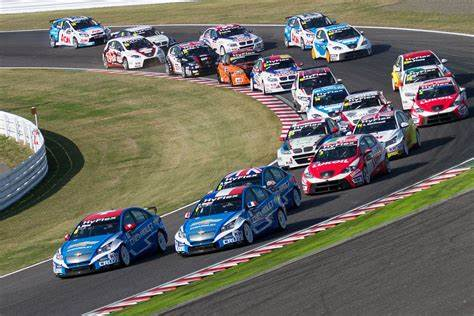

In [6]:
image

In [7]:
caption = pipe(image)
print(caption)

[{'generated_text': 'arafed race cars racing on a track with a green grass area'}]
